<img src="images/logodwengo.png" alt="Banner" style="width: 150px;"/>

<div style='color: #690027;' markdown="1">
    <h1>LINEAIRE REGRESSIE</h1> 
</div>

<div class="alert alert-box alert-success">
In deze notebook zal je leren hoe je een regressielijn bepaalt met Python. Je gebruikt daarbij de data van in de vorige notebook. Een regressielijn is een rechte die het best past bij de data en een eventuele trend die vervat is in de data weerspiegelt. 
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression    # voor regressie

<div style='color: #690027;' markdown="1">
    <h2>1. Data inlezen en visualiseren</h2> 
</div>

Je leest een csv-file in die de evolutie van de bevolkingsaantallen bevat over enkele decennia [1]. Je zal deze data visualiseren.

### Opgave
Lees het bestand in en laat de puntenwolk zien (zie vorige notebook).

In [2]:
punten = pd.read_csv("data/csv.dat")
punten

,x,y
0,28,33
1,40,35
2,41,47
3,44,35
4,45,55
5,51,56
6,54,50
7,57,50
8,57,70
9,60,65


In [3]:
# voorbeeldscript
# data inlezen en puntenwolk weergeven

x = punten["x"]              # jaar komt op x-as
y = punten["y"]          # aantal komt op y-as

x = np.array(x)
y = np.array(y)

In [4]:
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
print(x_min, x_max, y_min, y_max)

28 113 33 100


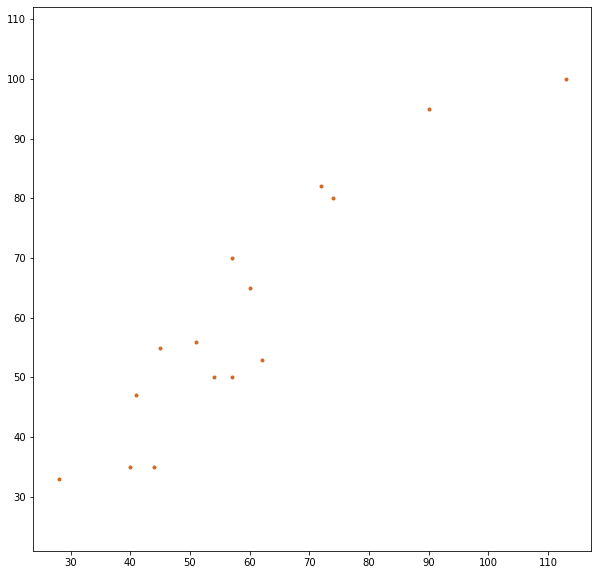

In [5]:
plt.figure(figsize=(10,10))                       # creëer tekenvenster

plt.axis(xmin=0, xmax=130, ymin=0, ymax=130)        # vensterinstellingen
plt.axis("equal")
plt.xticks(np.arange(0, 130, step=10))
plt.yticks(np.arange(0, 130, step=10))
                        
plt.scatter(x, y, color="chocolate", marker=".")      # plot puntenwolk

plt.show()                                        # toon grafiek

<div style='color: #690027;' markdown="1">
    <h2>2. Lineaire regressie</h2> 
</div>

In [6]:
# regressie
X = x[:, np.newaxis]                             # data in verwachte formaat
regressielijn = LinearRegression()               #'regressielijn' is resultaat van lineaire regressie
regressielijn.fit(X,y)                           #'regressielijn' doen passen bij data 

LinearRegression()

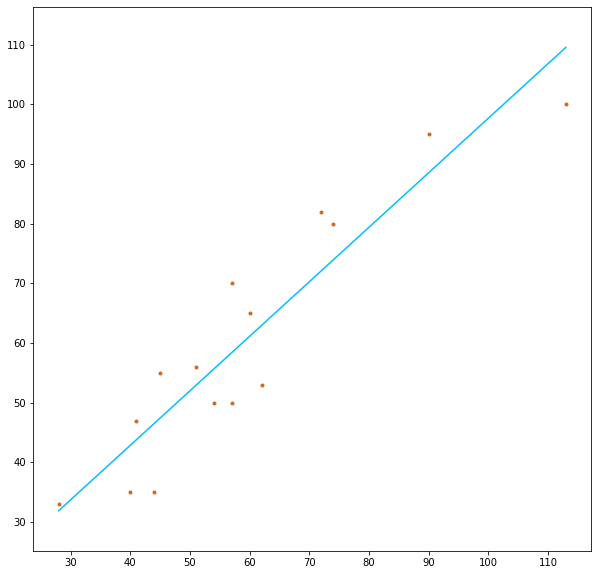

In [7]:
# grafiek puntenwolk samen met regressielijn
plt.figure(figsize=(10,10))                       # creëer tekenvenster

plt.axis(xmin=0, xmax=130, ymin=0, ymax=130)        # vensterinstellingen
plt.axis("equal")
plt.xticks(np.arange(0, 130, step=10))
plt.yticks(np.arange(0, 130, step=10))
                        
plt.scatter(x, y, color="chocolate", marker=".")      # plot puntenwolk     

plt.plot(x, regressielijn.predict(X), color="deepskyblue")    # plot regressielijn

plt.show()                                        # toon grafiek

<div style='color: #690027;' markdown="1">
    <h2>3. Vergelijking van de rechte</h2> 
</div>

Een rechte is bepaals door twee punten. Bepaal door de volgende codecel uit te voeren twee punten van de regressielijn. <br>
`regressielijn.predict(X)` is het functievoorschrift ervan.

In [8]:
# twee punten
x_oprechte = np.array([50, 100])

In [9]:
# twee punten
X_oprechte = x_oprechte[:, np.newaxis]
y_oprechte = regressielijn.predict(X_oprechte)
print(x_oprechte, y_oprechte)

[ 50 100] [51.99602756 97.66979083]


In [10]:
# functievoorschrift rechte
# y - y1 = m ( x-x1)  met m = (y2-y1)/(x2-x1)
# y = (y2-y1)/(x2-x1) ( x-x1) + y1 
# y = (y2-y1)/(x2-x1) x - (y2-y1)/(x2-x1) x1 + y1 

rico = (y_oprechte[1] - y_oprechte[0])/(x_oprechte[1] - x_oprechte[0]) 
constanteterm = - rico * x_oprechte[0] + y_oprechte[0]  
print("De regressielijn heeft als vergelijking:")
print("y =", rico, "x +", constanteterm)

De regressielijn heeft als vergelijking:
y = 0.9134752653466579 x + 6.32226429147785


### Referentielijst

[1] STATBEL. Loop van de bevolking in 2020. https://statbel.fgov.be/nl/themas/bevolking/loop-van-de-bevolking#figures

<img src="images/cclic.png" alt="Banner" align="left" style="width:100px;"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels, B. Van de Velde & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 